<a href="https://colab.research.google.com/github/AbhinandanRoy7/Project/blob/main/CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [5]:
df.isnull().count()

,0
customerID,7043
gender,7043
SeniorCitizen,7043
Partner,7043
Dependents,7043
tenure,7043
PhoneService,7043
MultipleLines,7043
InternetService,7043
OnlineSecurity,7043


In [6]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [7]:
df['Churn'].value_counts()#data imbalance is present

,count
Churn,
No,5174
Yes,1869


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
# printing the unique values in all the columns

numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*50)

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
--------------------------------------------------
gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
---------------------------------------

In [10]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # Categorical columns: Columns with object (string-like) data type
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    # Numerical columns that are actually categorical
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    # Object-type columns with unique values more than `car_th` (likely to be IDs or high cardinality text)
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    # Combine actual categorical columns and numeric-but-categorical ones
    cat_cols = cat_cols + num_but_cat
    # Remove high-cardinality categorical columns from the final categorical column list
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 2
cat_but_car: 2
num_but_cat: 1


In [11]:
# Displays the count and percentage distribution of each category in the specified column
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

for col in cat_cols:
    cat_summary(df, col)

        gender     Ratio
gender                  
Male      3555  50.47565
Female    3488  49.52435
##########################################
         Partner     Ratio
Partner                   
No          3641  51.69672
Yes         3402  48.30328
##########################################
            Dependents      Ratio
Dependents                       
No                4933  70.041176
Yes               2110  29.958824
##########################################
              PhoneService      Ratio
PhoneService                         
Yes                   6361  90.316626
No                     682   9.683374
##########################################
                  MultipleLines      Ratio
MultipleLines                             
No                         3390  48.132898
Yes                        2971  42.183729
No phone service            682   9.683374
##########################################
                 InternetService      Ratio
InternetService               

In [12]:
df_new=df.copy()

In [13]:
# Calculates and displays the mean of each numerical column grouped by the target variable
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(df_new, "Churn", col)

          tenure
Churn           
No     37.569965
Yes    17.979133


       MonthlyCharges
Churn                
No          61.265124
Yes         74.441332




In [14]:
def num_summary(dataframe, numerical_col):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
for col in num_cols:
    num_summary(df_new, col)

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
5%          1.000000
10%         2.000000
20%         6.000000
30%        12.000000
40%        20.000000
50%        29.000000
60%        40.000000
70%        50.000000
80%        60.000000
90%        69.000000
95%        72.000000
99%        72.000000
max        72.000000
Name: tenure, dtype: float64
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
5%         19.650000
10%        20.050000
20%        25.050000
30%        45.850000
40%        58.830000
50%        70.350000
60%        79.100000
70%        85.500000
80%        94.250000
90%       102.600000
95%       107.400000
99%       114.729000
max       118.750000
Name: MonthlyCharges, dtype: float64


In [15]:
df_new.drop(columns=['customerID'], axis=1,inplace=True)
df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df_new.TotalCharges =pd.to_numeric(df.TotalCharges,errors='coerce')
df_new.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [17]:
df_new.loc[df_new['TotalCharges'].isnull()==True]#it will show the missing values

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [18]:
df_zero_fill = df_new.copy()
df_zero_fill['TotalCharges'].fillna(0, inplace=True)

<ipython-input-18-417e7076c890>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_zero_fill['TotalCharges'].fillna(0, inplace=True)


In [19]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df_predict = df_new.copy()


df_predict = pd.get_dummies(df_predict)


df_known = df_predict[df_predict['TotalCharges'].notnull()]
df_unknown = df_predict[df_predict['TotalCharges'].isnull()]


X_known = df_known.drop('TotalCharges', axis=1)
y_known = df_known['TotalCharges']

X_unknown = df_unknown.drop('TotalCharges', axis=1)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_known, y_known)


predicted_values = model.predict(X_unknown)


df_new.loc[df_new['TotalCharges'].isnull(), 'TotalCharges'] = predicted_values


print(df_new['TotalCharges'].isnull().sum())


0


In [21]:
df_new.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


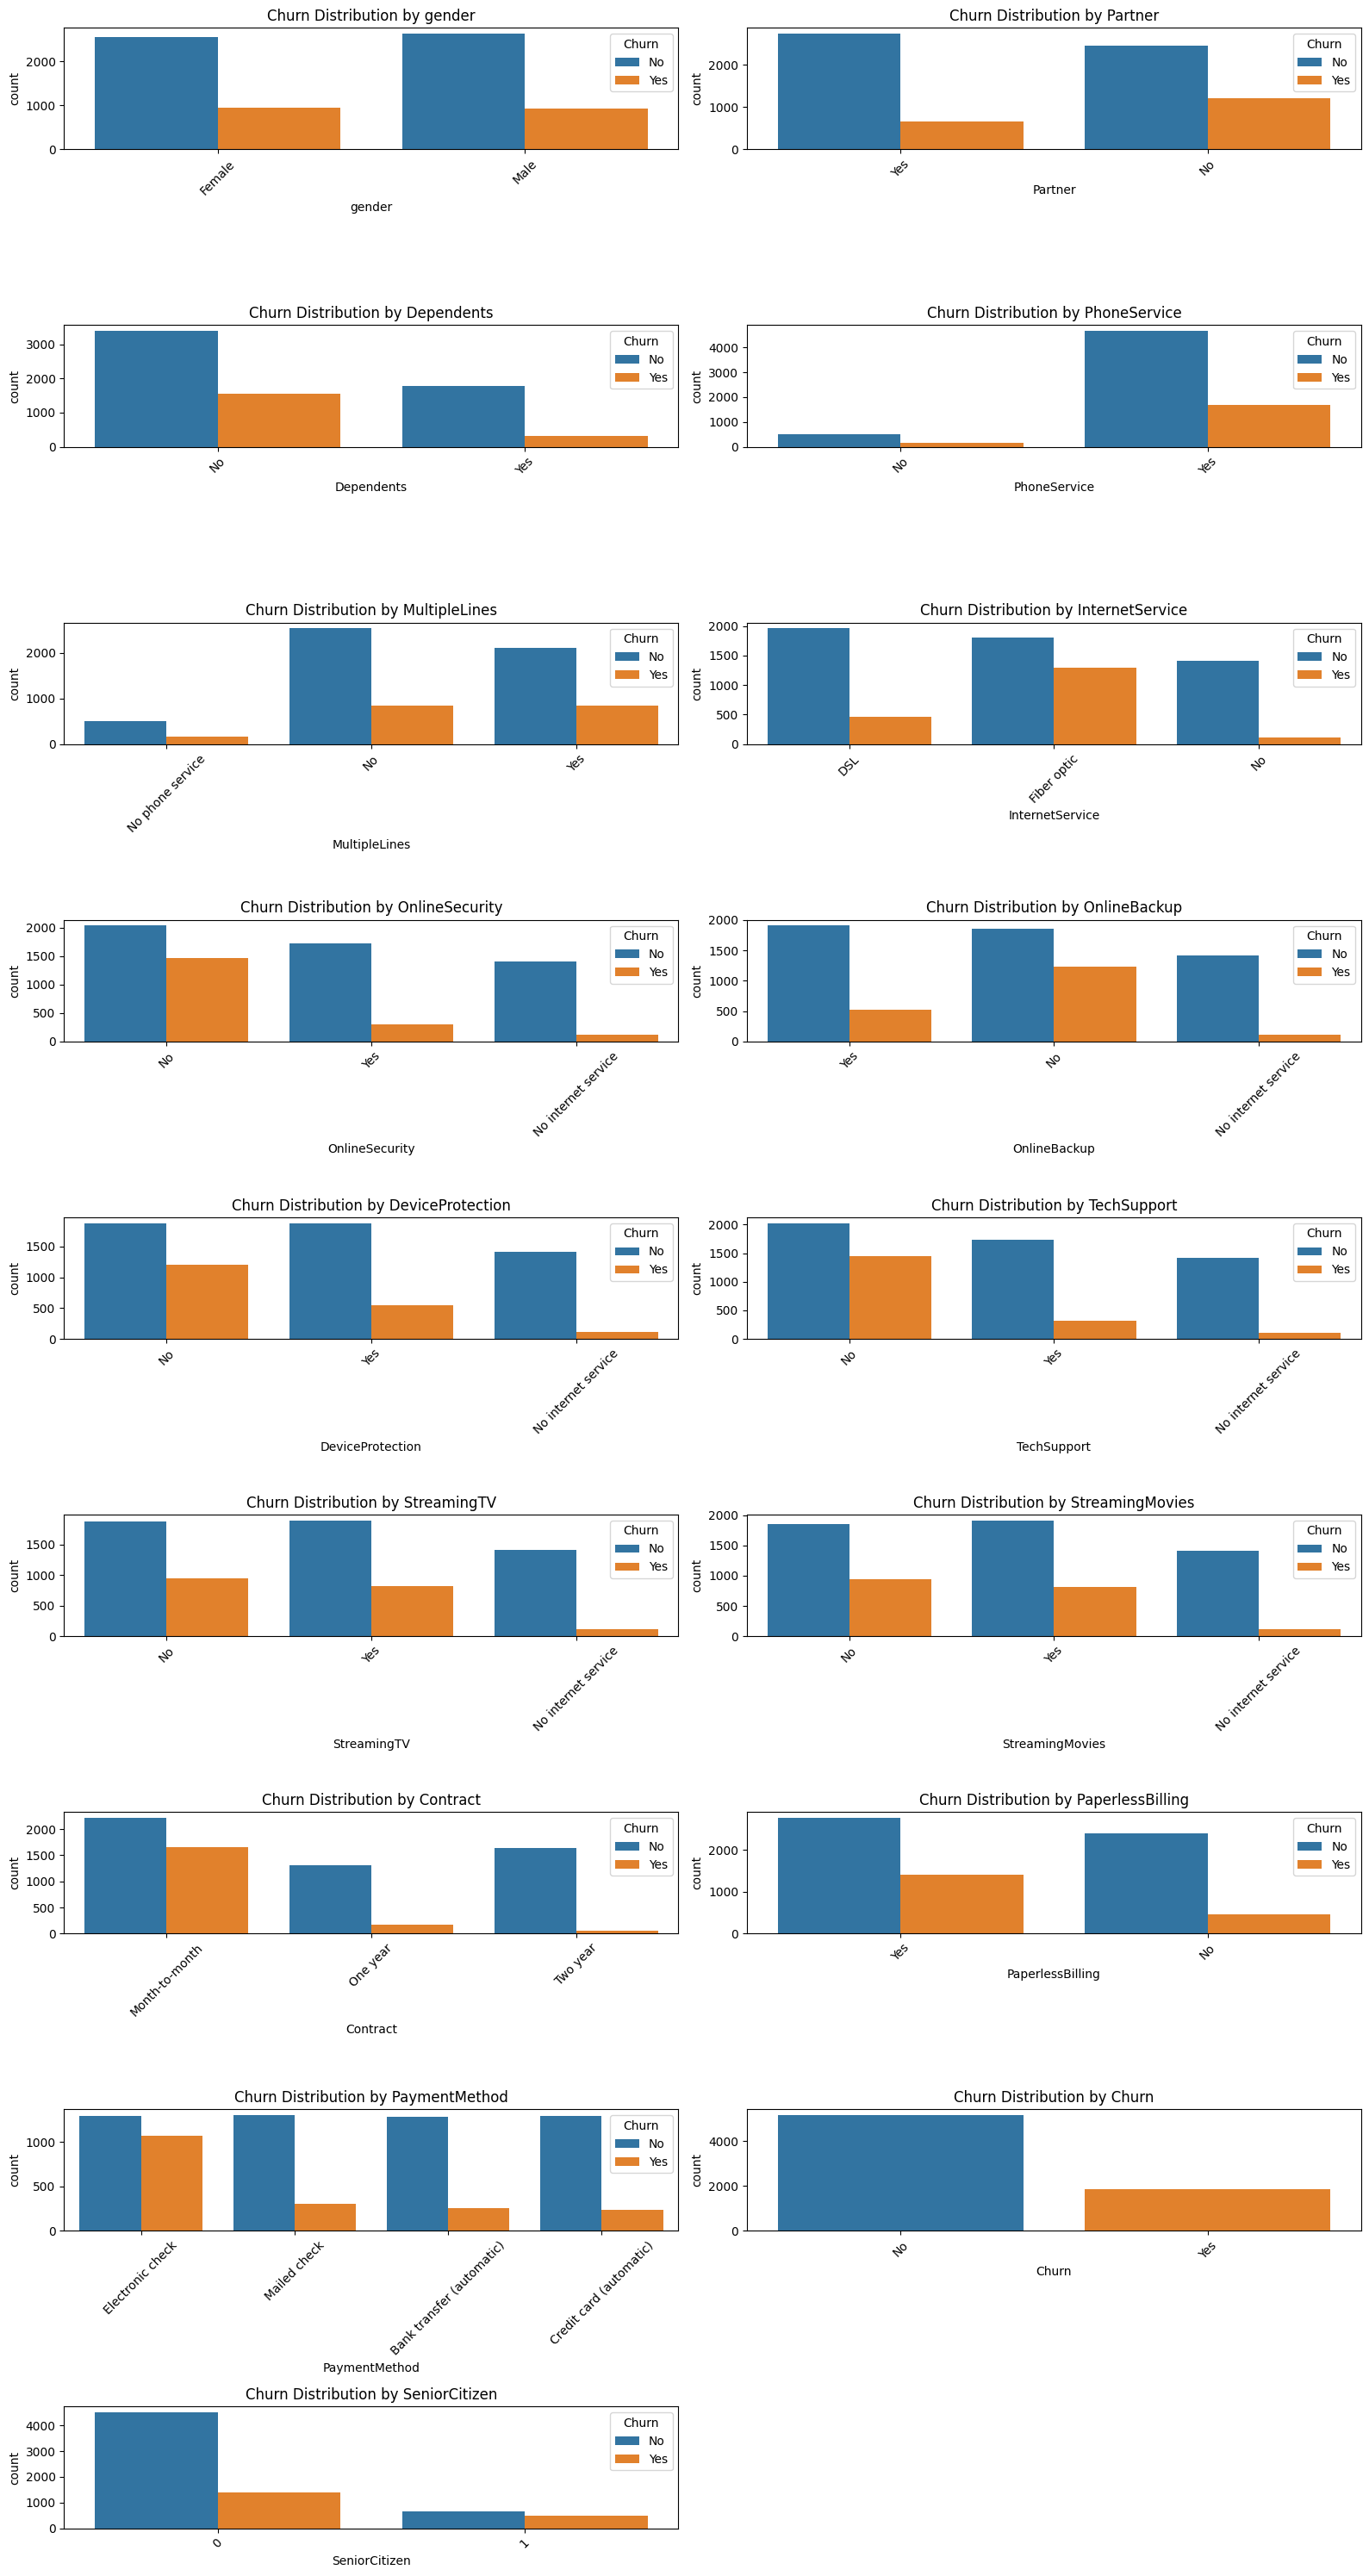

In [22]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)


plt.figure(figsize=(16, 30))
for i, col in enumerate(cat_cols):
    plt.subplot(len(cat_cols) // 2 + 1, 2, i + 1)
    sns.countplot(data=df, x=col, hue="Churn")
    plt.title(f"Churn Distribution by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


In [37]:
df_encoded= pd.get_dummies(df_new,dtype=int)
df_encoded.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)
df_encoded.drop(columns='Churn_No',inplace=True)

df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,29.85,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,1,0,0,0,1,0,0,0,1,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,1


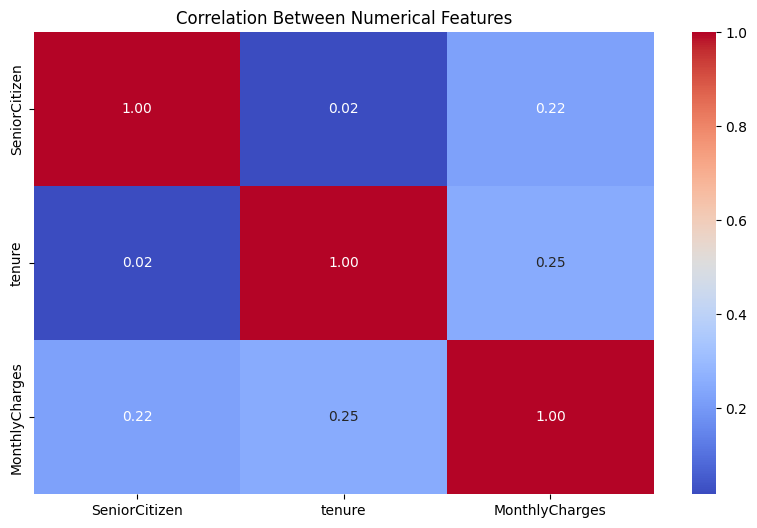

In [24]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()

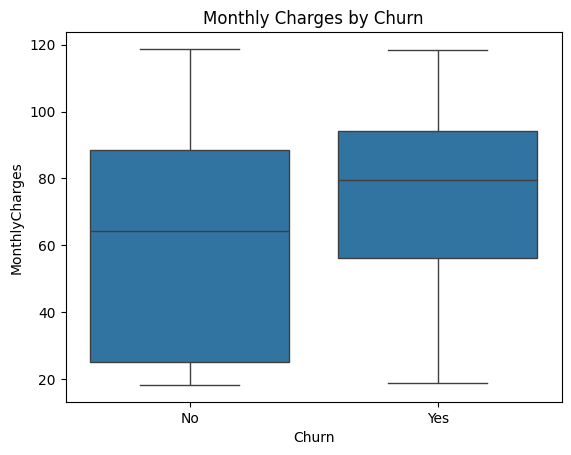

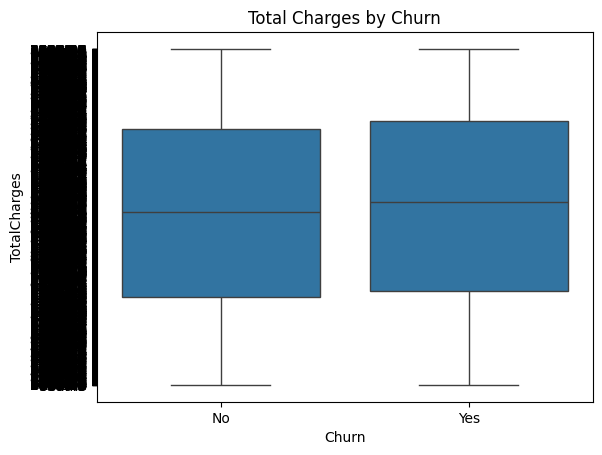

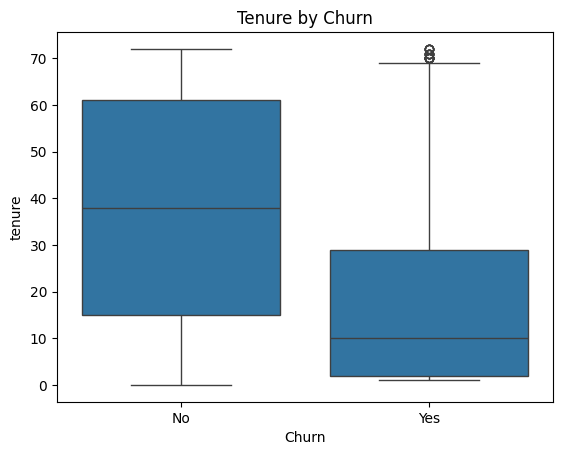

In [25]:
# MonthlyCharges vs Churn
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn')
plt.show()

# TotalCharges vs Churn
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title('Total Charges by Churn')
plt.show()

# Tenure vs Churn
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure by Churn')
plt.show()


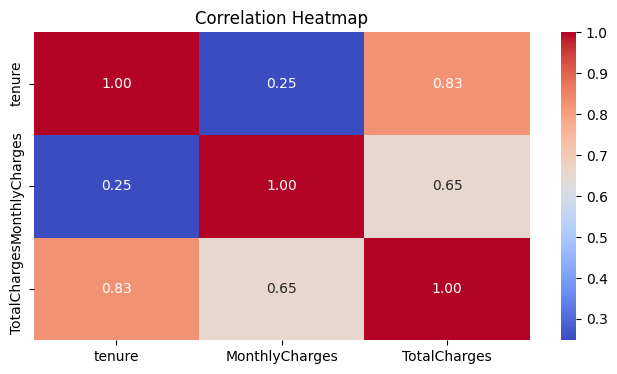

In [26]:
plt.figure(figsize=(8, 4))
sns.heatmap(df_encoded[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

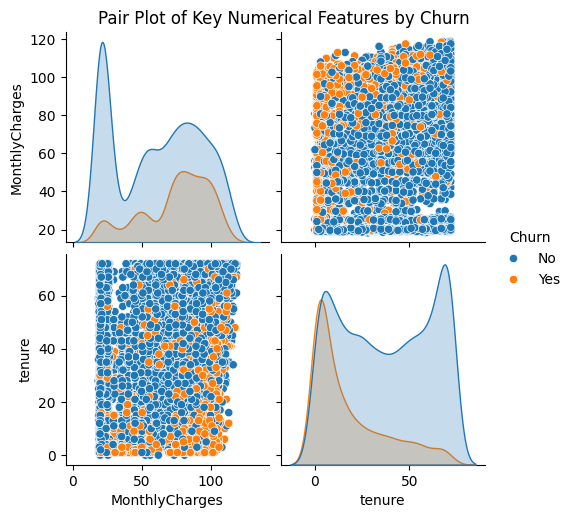

In [27]:
sns.pairplot(df[['MonthlyCharges', 'TotalCharges', 'tenure', 'Churn']], hue='Churn')
plt.suptitle('Pair Plot of Key Numerical Features by Churn', y=1.02)
plt.show()

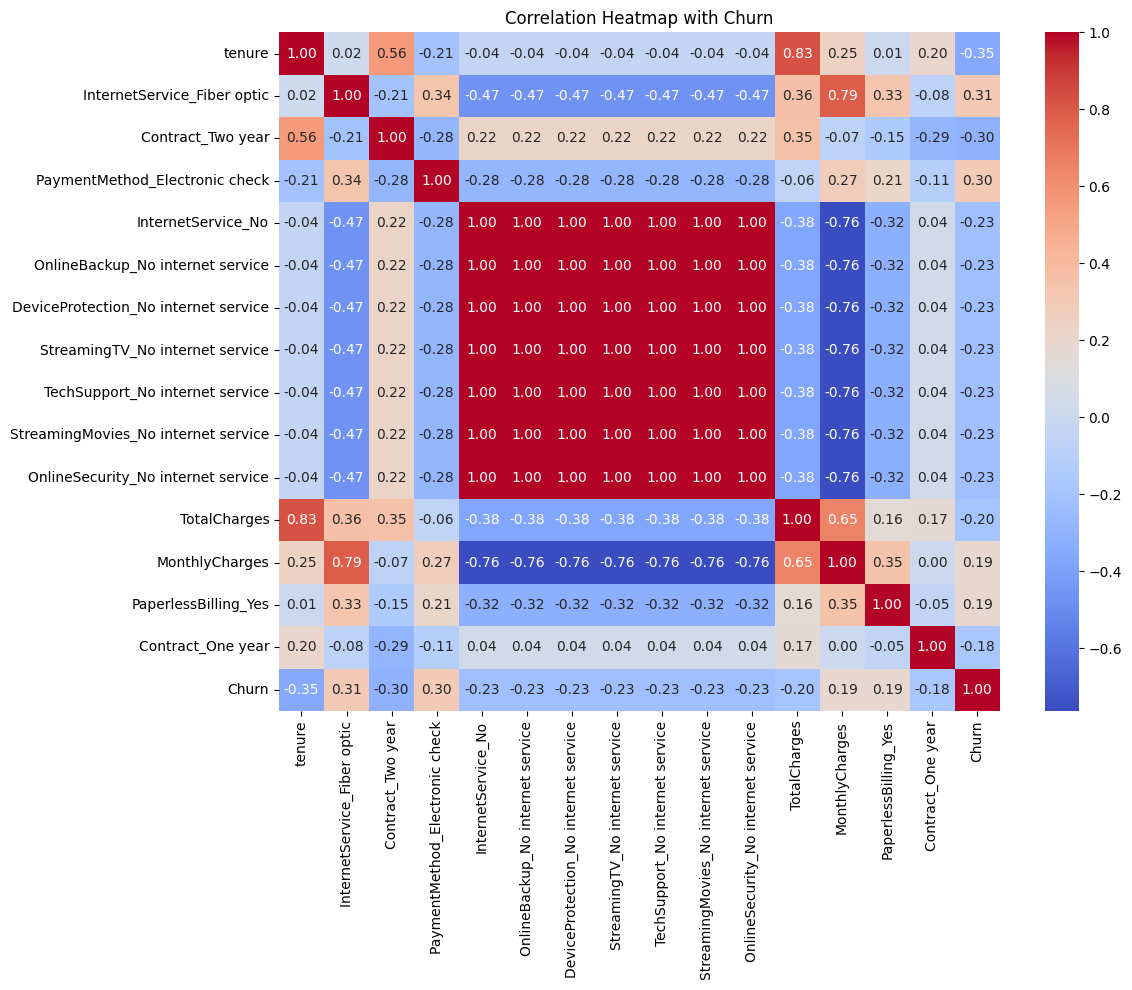

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlations with Churn
correlations = df_encoded.corr(numeric_only=True)['Churn'].sort_values(key=abs, ascending=False)

# Top 15 features most correlated with Churn (excluding 'Churn' itself)
top_corr_features = correlations.index[1:16]


plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded[top_corr_features.tolist() + ['Churn']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap with Churn")
plt.tight_layout()
plt.show()


In [29]:
df_encoded.to_csv('telco_encoded.csv')

In [34]:
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn,PaymentRiskScore,NoSupportOrSecurity,ContractFlexibility
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,1,0,1,0,0,1,1,1
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,2
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,1,0,0,1,1,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,2
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,1,0,1,0,1,1,1,1


Feature Engineering

In [31]:
# Safely get columns or default to 0 Series
online_security = df_encoded['OnlineSecurity_1'] if 'OnlineSecurity_1' in df_encoded.columns else pd.Series([0]*len(df_encoded))
tech_support = df_encoded['TechSupport_1'] if 'TechSupport_1' in df_encoded.columns else pd.Series([0]*len(df_encoded))

# Now calculate safely
df_encoded['NoSupportOrSecurity'] = ((1 - online_security) & (1 - tech_support)).astype(int)


In [38]:
# 1. Average Charges Per Month
df_encoded['AverageChargesPerMonth'] = df_encoded['TotalCharges'] / df_encoded['tenure'].replace(0, np.nan)
df_encoded['AverageChargesPerMonth'] = df_encoded['AverageChargesPerMonth'].fillna(0)

# 2. Is Short Tenure (under 12 months)
df_encoded['IsShortTenure'] = (df_encoded['tenure'] < 12).astype(int)

# 3. No Protection Services (no online security and no tech support)
df_encoded['NoProtection'] = (
    (1 - df_encoded.get('OnlineSecurity_Yes', 0).astype(int)) &
    (1 - df_encoded.get('TechSupport_Yes', 0).astype(int))
).astype(int)

# 4. Contract Flexibility Score (more flexible = more churn-prone)
df_encoded['ContractFlexibility'] = (
    1 - df_encoded.get('Contract_One year', 0) - df_encoded.get('Contract_Two year', 0)
)

# 5. Is Electronic Check Payment
df_encoded['IsElectronicCheck'] = df_encoded.get('PaymentMethod_Electronic check', 0)

# 6. Total Optional Services Active
optional_services = [
    'MultipleLines_Yes',
    'InternetService_Fiber optic', 'InternetService_DSL',
    'OnlineSecurity_Yes', 'OnlineBackup_Yes',
    'DeviceProtection_Yes', 'TechSupport_Yes',
    'StreamingTV_Yes', 'StreamingMovies_Yes'
]
optional_services = [col for col in optional_services if col in df_encoded.columns]
df_encoded['TotalServices'] = df_encoded[optional_services].sum(axis=1)

# 7. Senior Discount Flag (0 if senior, 1 if not)
df_encoded['IsNonSenior'] = (df_encoded['SeniorCitizen'] == 0).astype(int)

# 8. High Monthly Charges Flag (top 25%)
charge_threshold = df_encoded['MonthlyCharges'].quantile(0.75)
df_encoded['HighMonthlyCharges'] = (df_encoded['MonthlyCharges'] > charge_threshold).astype(int)

# 9. Low Tenure & High Charges (double risk)
df_encoded['LowTenure_HighCharges'] = ((df_encoded['IsShortTenure'] == 1) & (df_encoded['HighMonthlyCharges'] == 1)).astype(int)

# Drop unnecessary index column
df_encoded.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

# Display new features
df_encoded[['AverageChargesPerMonth', 'IsShortTenure', 'NoProtection', 'ContractFlexibility',
            'IsElectronicCheck', 'TotalServices', 'IsNonSenior', 'HighMonthlyCharges',
            'LowTenure_HighCharges']].describe()

,AverageChargesPerMonth,IsShortTenure,NoProtection,ContractFlexibility,IsElectronicCheck,TotalServices,IsNonSenior,HighMonthlyCharges,LowTenure_HighCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,64.698218,0.293767,0.579157,0.550192,0.335794,3.243078,0.837853,0.249610,0.028823
std,30.270670,0.455519,0.493730,0.497510,0.472301,2.307141,0.368612,0.432818,0.167321
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.649000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,70.300000,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000
75%,90.174158,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,0.000000,0.000000
max,121.400000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000


In [39]:
df_encoded['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [40]:
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Churn,AverageChargesPerMonth,IsShortTenure,NoProtection,ContractFlexibility,IsElectronicCheck,TotalServices,IsNonSenior,HighMonthlyCharges,LowTenure_HighCharges
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,29.850000,1,1,1,1,2,1,0,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,55.573529,0,0,0,0,3,1,0,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,1,54.075000,1,0,1,0,3,1,0,0
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,40.905556,0,0,0,0,4,1,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,1,75.825000,1,1,1,1,1,1,0,0


In [41]:
pip install imbalanced-learn

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# print("Before SMOTE:\n", y_train.value_counts())
# print("\nAfter SMOTE:\n", y_train_resampled.value_counts())


In [43]:
X=df_encoded.drop('Churn',axis=1)
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Mailed check,AverageChargesPerMonth,IsShortTenure,NoProtection,ContractFlexibility,IsElectronicCheck,TotalServices,IsNonSenior,HighMonthlyCharges,LowTenure_HighCharges
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,29.850000,1,1,1,1,2,1,0,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,1,55.573529,0,0,0,0,3,1,0,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,1,54.075000,1,0,1,0,3,1,0,0
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,40.905556,0,0,0,0,4,1,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,75.825000,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,82.937500,0,0,0,0,7,1,0,0
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,0,102.262500,0,1,0,0,6,1,1,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,31.495455,1,0,1,1,2,1,0,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,1,76.650000,1,1,1,0,2,0,0,0


In [44]:
y=df_encoded['Churn']
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [59]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [47]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [48]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [49]:
y_pred=model_dt.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [50]:
model_dt.score(X_test,y_test)

0.7977288857345636

In [51]:
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, labels=[0,1]))

[[933 113]
 [172 191]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1046
           1       0.63      0.53      0.57       363

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [52]:
sm = SMOTEENN()
X_sam, y_sam = sm.fit_resample(X,y)

In [53]:
Xs_train,Xs_test,ys_train,ys_test=train_test_split(X_sam, y_sam,test_size=0.3)

In [67]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt_smote.fit(Xs_train,ys_train)

ys_pred = model_dt_smote.predict(Xs_test)
model_score_r = model_dt_smote.score(Xs_test, ys_test)


ys_train_pred = model_dt_smote.predict(Xs_train)
train_score = model_dt_smote.score(Xs_train, ys_train)
train_auc = roc_auc_score(ys_train, ys_train_pred)


test_score = model_dt_smote.score(Xs_test, ys_test)
test_auc = roc_auc_score(ys_test, ys_pred)


print("Train Accuracy:", train_score)
print("Test Accuracy:", test_score)
print("Train AUC:", train_auc)
print("Test AUC:", test_auc)
print(model_score_r)
print(metrics.confusion_matrix(ys_test, ys_pred))
print(metrics.classification_report(ys_test, ys_pred))

Train Accuracy: 0.947242206235012
Test Accuracy: 0.9401565995525727
Train AUC: 0.946684894053315
Test AUC: 0.9393227959433801
0.9401565995525727
[[732  53]
 [ 54 949]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       785
           1       0.95      0.95      0.95      1003

    accuracy                           0.94      1788
   macro avg       0.94      0.94      0.94      1788
weighted avg       0.94      0.94      0.94      1788



In [55]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X_sam, y_sam, test_size=0.2, random_state=42, stratify=y_sam)

In [56]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    class_weight='balanced'
)

In [57]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [61]:
from sklearn.metrics import roc_auc_score

In [77]:
y_pred = rf_model.predict(Xs_test)
y_proba = rf_model.predict_proba(Xs_test)[:, 1]


print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
Confusion Matrix:


ValueError: Found input variables with inconsistent numbers of samples: [1192, 1788]

In [68]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(Xs_train, ys_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [75]:
ys_pred = model_lr.predict(Xs_test)
model_score_r = model_lr.score(Xs_test, ys_test)


ys_train_pred = model_lr.predict(Xs_train)
train_score = model_lr.score(Xs_train, ys_train)
train_auc = roc_auc_score(ys_train, ys_train_pred)


test_score = model_lr.score(Xs_test, ys_test)
test_auc = roc_auc_score(ys_test, ys_pred)


print("Train Accuracy:", train_score)
print("Test Accuracy:", test_score)
print("Train AUC:", train_auc)
print("Test AUC:", test_auc)
print(model_lr)
print(metrics.confusion_matrix(ys_test, ys_pred))
print(metrics.classification_report(ys_test, ys_pred))

Train Accuracy: 0.9486810551558753
Test Accuracy: 0.9451901565995525
Train AUC: 0.9479481299857929
Test AUC: 0.9450552800198132
LogisticRegression(max_iter=1000)
[[741  44]
 [ 54 949]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       785
           1       0.96      0.95      0.95      1003

    accuracy                           0.95      1788
   macro avg       0.94      0.95      0.94      1788
weighted avg       0.95      0.95      0.95      1788



In [70]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(Xs_train, ys_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:05:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [78]:
ys_pred = model_xgb.predict(Xs_test)
model_score_r = model_xgb.score(Xs_test, ys_test)


ys_train_pred = model_xgb.predict(Xs_train)
train_score = model_xgb.score(Xs_train, ys_train)
train_auc = roc_auc_score(ys_train, ys_train_pred)


test_score = model_xgb.score(Xs_test, ys_test)
test_auc = roc_auc_score(ys_test, ys_pred)


print("Train Accuracy:", train_score)
print("Test Accuracy:", test_score)
print("Train AUC:", train_auc)
print("Test AUC:", test_auc)
print(model_xgb)
print(metrics.confusion_matrix(ys_test, ys_pred))
print(metrics.classification_report(ys_test, ys_pred))

Train Accuracy: 1.0
Test Accuracy: 0.9569351230425056
Train AUC: 1.0
Test AUC: 0.9562160651802555
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)
[[746  39]
 [ 38 965]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       785
       

XGBoost is showing overfitting


In [71]:
from sklearn.svm import SVC
model_svm = SVC(kernel='rbf', probability=True)
model_svm.fit(Xs_train, ys_train)

SVC(probability=True)

In [79]:
ys_pred = model_svm.predict(Xs_test)
model_score_r = model_svm.score(Xs_test, ys_test)


ys_train_pred = model_svm.predict(Xs_train)
train_score = model_svm.score(Xs_train, ys_train)
train_auc = roc_auc_score(ys_train, ys_train_pred)


test_score = model_svm.score(Xs_test, ys_test)
test_auc = roc_auc_score(ys_test, ys_pred)


print("Train Accuracy:", train_score)
print("Test Accuracy:", test_score)
print("Train AUC:", train_auc)
print("Test AUC:", test_auc)
print(model_svm)
print(metrics.confusion_matrix(ys_test, ys_pred))
print(metrics.classification_report(ys_test, ys_pred))

Train Accuracy: 0.8529976019184652
Test Accuracy: 0.8529082774049217
Train AUC: 0.847336230484468
Test AUC: 0.8466047716722445
SVC(probability=True)
[[624 161]
 [102 901]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.83       785
           1       0.85      0.90      0.87      1003

    accuracy                           0.85      1788
   macro avg       0.85      0.85      0.85      1788
weighted avg       0.85      0.85      0.85      1788



In [72]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(Xs_train, ys_train)

KNeighborsClassifier()

In [80]:
ys_pred = model_knn.predict(Xs_test)
model_score_r = model_knn.score(Xs_test, ys_test)


ys_train_pred = model_knn.predict(Xs_train)
train_score = model_knn.score(Xs_train, ys_train)
train_auc = roc_auc_score(ys_train, ys_train_pred)


test_score = model_knn.score(Xs_test, ys_test)
test_auc = roc_auc_score(ys_test, ys_pred)


print("Train Accuracy:", train_score)
print("Test Accuracy:", test_score)
print("Train AUC:", train_auc)
print("Test AUC:", test_auc)
print(model_knn)
print(metrics.confusion_matrix(ys_test, ys_pred))
print(metrics.classification_report(ys_test, ys_pred))

Train Accuracy: 0.9709832134292566
Test Accuracy: 0.9491051454138703
Train AUC: 0.96939979919217
Test AUC: 0.9457760476532187
KNeighborsClassifier()
[[721  64]
 [ 27 976]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       785
           1       0.94      0.97      0.96      1003

    accuracy                           0.95      1788
   macro avg       0.95      0.95      0.95      1788
weighted avg       0.95      0.95      0.95      1788



In [73]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(Xs_train, ys_train)

GaussianNB()

In [81]:
ys_pred = model_nb.predict(Xs_test)
model_score_r = model_nb.score(Xs_test, ys_test)


ys_train_pred = model_nb.predict(Xs_train)
train_score = model_nb.score(Xs_train, ys_train)
train_auc = roc_auc_score(ys_train, ys_train_pred)


test_score = model_nb.score(Xs_test, ys_test)
test_auc = roc_auc_score(ys_test, ys_pred)


print("Train Accuracy:", train_score)
print("Test Accuracy:", test_score)
print("Train AUC:", train_auc)
print("Test AUC:", test_auc)
print(model_nb)
print(metrics.confusion_matrix(ys_test, ys_pred))
print(metrics.classification_report(ys_test, ys_pred))

Train Accuracy: 0.9009592326139089
Test Accuracy: 0.9004474272930649
Train AUC: 0.8987463794320385
Test AUC: 0.8981145734770212
GaussianNB()
[[690  95]
 [ 83 920]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       785
           1       0.91      0.92      0.91      1003

    accuracy                           0.90      1788
   macro avg       0.90      0.90      0.90      1788
weighted avg       0.90      0.90      0.90      1788

